# Implement Clustering and then predict the class of car from “Car dataset”.

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('CarPrice_Assignment.csv')
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
d_col = ['CarName','car_ID']
new_data = data.drop(d_col, axis = 1)

In [4]:
new_data.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [5]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   fueltype          205 non-null    object 
 2   aspiration        205 non-null    object 
 3   doornumber        205 non-null    object 
 4   carbody           205 non-null    object 
 5   drivewheel        205 non-null    object 
 6   enginelocation    205 non-null    object 
 7   wheelbase         205 non-null    float64
 8   carlength         205 non-null    float64
 9   carwidth          205 non-null    float64
 10  carheight         205 non-null    float64
 11  curbweight        205 non-null    int64  
 12  enginetype        205 non-null    object 
 13  cylindernumber    205 non-null    object 
 14  enginesize        205 non-null    int64  
 15  fuelsystem        205 non-null    object 
 16  boreratio         205 non-null    float64
 1

In [6]:
print(data['fueltype'].value_counts())
print('\n\n')
print(data['aspiration'].value_counts())
print('\n\n')
print(data['doornumber'].value_counts())
print('\n\n')
print(data['carbody'].value_counts())
print('\n\n')
print(data['drivewheel'].value_counts())
print('\n\n')
print(data['enginelocation'].value_counts())
print('\n\n')
print(data['enginetype'].value_counts())
print('\n\n')
print(data['cylindernumber'].value_counts())
print('\n\n')
print(data['fuelsystem'].value_counts())


gas       185
diesel     20
Name: fueltype, dtype: int64



std      168
turbo     37
Name: aspiration, dtype: int64



four    115
two      90
Name: doornumber, dtype: int64



sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64



fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64



front    202
rear       3
Name: enginelocation, dtype: int64



ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: enginetype, dtype: int64



four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: cylindernumber, dtype: int64



mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: fuelsystem, dtype: int64


In [7]:
new_data['fueltype'] = new_data['fueltype'].map({'gas':1, 'diesel': 2})
new_data['aspiration'] = new_data['aspiration'].map({'std': 1, 'turbo': 2})
new_data['doornumber'] = new_data['doornumber'].map({'two': 2, 'four': 4})
new_data['carbody'] = new_data['carbody'].map({'sedan':1,'hatchback':2,'wagon':3,'hardtop':4,'convertible':5})
new_data['drivewheel'] = new_data['drivewheel'].map({'fwd':1, 'rwd':2, '4wd':3})
new_data['enginelocation'] = new_data['enginelocation'].map({'front':1, 'rear':2})
new_data['enginetype'] = new_data['enginetype'].map({'ohc':1,'ohcf':2,'ohcv':3,'dohc':4,'l':5,'rotor':6,'dohcv':7})
new_data['cylindernumber'] = new_data['cylindernumber'].map({'four':4,'six':6,'five':5,'eight':8,'two':2,'three':3,'twelve':12})
new_data['fuelsystem'] = new_data['fuelsystem'].map({'mpfi':1,'2bbl':2,'idi':3,'1bbl':4,'spdi':5,'4bbl':6,'mfi':7,'spfi':8})

In [8]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   fueltype          205 non-null    int64  
 2   aspiration        205 non-null    int64  
 3   doornumber        205 non-null    int64  
 4   carbody           205 non-null    int64  
 5   drivewheel        205 non-null    int64  
 6   enginelocation    205 non-null    int64  
 7   wheelbase         205 non-null    float64
 8   carlength         205 non-null    float64
 9   carwidth          205 non-null    float64
 10  carheight         205 non-null    float64
 11  curbweight        205 non-null    int64  
 12  enginetype        205 non-null    int64  
 13  cylindernumber    205 non-null    int64  
 14  enginesize        205 non-null    int64  
 15  fuelsystem        205 non-null    int64  
 16  boreratio         205 non-null    float64
 1

In [9]:
new_data.corr()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
symboling,1.000000,-0.194311,-0.059866,-0.664073,0.301354,-0.111150,0.212471,-0.531954,-0.357612,-0.232919,...,-0.105790,0.155724,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978
fueltype,-0.194311,1.000000,0.401397,0.191491,-0.106275,0.051874,-0.040070,0.308346,0.212679,0.233880,...,0.069594,0.254827,0.054451,0.241829,0.984356,-0.163926,-0.476883,0.255963,0.191392,0.105679
aspiration,-0.059866,0.401397,1.000000,0.031792,-0.055455,0.153897,-0.057191,0.257611,0.234539,0.300567,...,0.108217,0.266364,0.212614,0.222982,0.295541,0.241685,-0.183383,-0.202362,-0.254416,0.177926
doornumber,-0.664073,0.191491,0.031792,1.000000,-0.340507,0.004549,-0.137757,0.447357,0.398568,0.207168,...,0.020742,-0.165059,0.119258,-0.011082,0.177888,-0.126947,-0.247668,-0.012417,-0.036330,0.031835
carbody,0.301354,-0.106275,-0.055455,-0.340507,1.000000,0.178462,0.309907,-0.170051,-0.071322,-0.045453,...,0.104722,-0.054393,0.154351,-0.092747,-0.105144,0.129639,0.006010,-0.137525,-0.143814,0.107031
drivewheel,-0.111150,0.051874,0.153897,0.004549,0.178462,1.000000,0.113823,0.366828,0.416076,0.376554,...,0.409914,-0.207202,0.512709,-0.192827,0.018903,0.445806,-0.139905,-0.503655,-0.549492,0.490739
enginelocation,0.212471,-0.040070,-0.057191,-0.137757,0.309907,0.113823,1.000000,-0.187790,-0.050989,-0.051698,...,0.196826,-0.092625,0.185042,-0.138455,-0.019762,0.317839,0.198461,-0.153487,-0.102026,0.324973
wheelbase,-0.531954,0.308346,0.257611,0.447357,-0.170051,0.366828,-0.187790,1.000000,0.874587,0.795144,...,0.569329,-0.229733,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,-0.357612,0.212679,0.234539,0.398568,-0.071322,0.416076,-0.050989,0.874587,1.000000,0.841118,...,0.683360,-0.310001,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,-0.232919,0.233880,0.300567,0.207168,-0.045453,0.376554,-0.051698,0.795144,0.841118,1.000000,...,0.735433,-0.220772,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325


In [10]:
new_data.describe().T

,count,mean,std,min,25%,50%,75%,max
symboling,205.0,0.834146,1.245307,-2.00,0.00,1.00,2.00,3.00
fueltype,205.0,1.097561,0.297446,1.00,1.00,1.00,1.00,2.00
aspiration,205.0,1.180488,0.385535,1.00,1.00,1.00,1.00,2.00
doornumber,205.0,3.121951,0.994966,2.00,2.00,4.00,4.00,4.00
carbody,205.0,1.819512,0.990944,1.00,1.00,2.00,2.00,5.00
drivewheel,205.0,1.458537,0.581148,1.00,1.00,1.00,2.00,3.00
enginelocation,205.0,1.014634,0.120377,1.00,1.00,1.00,1.00,2.00
wheelbase,205.0,98.756585,6.021776,86.60,94.50,97.00,102.40,120.90
carlength,205.0,174.049268,12.337289,141.10,166.30,173.20,183.10,208.10
carwidth,205.0,65.907805,2.145204,60.30,64.10,65.50,66.90,72.30


In [11]:
sc = StandardScaler()

scaled_data = sc.fit_transform(new_data)
scaled_data = pd.DataFrame(scaled_data, columns = new_data.columns)

scaled_data.head()


,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1.743470,-0.328798,-0.469295,-1.130388,3.217410,0.933994,-0.121867,-1.690772,-0.426521,-0.844782,...,0.074449,-0.760049,0.519071,-1.839377,-0.288349,0.174483,-0.262960,-0.646553,-0.546059,0.027391
1,1.743470,-0.328798,-0.469295,-1.130388,3.217410,0.933994,-0.121867,-1.690772,-0.426521,-0.844782,...,0.074449,-0.760049,0.519071,-1.839377,-0.288349,0.174483,-0.262960,-0.646553,-0.546059,0.404461
2,0.133509,-0.328798,-0.469295,-1.130388,0.182583,0.933994,-0.121867,-0.708596,-0.231513,-0.190566,...,0.604046,-0.760049,-2.404880,0.685946,-0.288349,1.264536,-0.262960,-0.953012,-0.691627,0.404461
3,0.938490,-0.328798,-0.469295,0.884652,-0.829026,-0.790950,-0.121867,0.173698,0.207256,0.136542,...,-0.431076,-0.760049,-0.517266,0.462183,-0.035973,-0.053668,0.787855,-0.186865,-0.109354,0.084485
4,0.938490,-0.328798,-0.469295,0.884652,-0.829026,2.658938,-0.121867,0.107110,0.207256,0.230001,...,0.218885,-0.760049,-0.517266,0.462183,-0.540725,0.275883,0.787855,-1.106241,-1.273900,0.523668


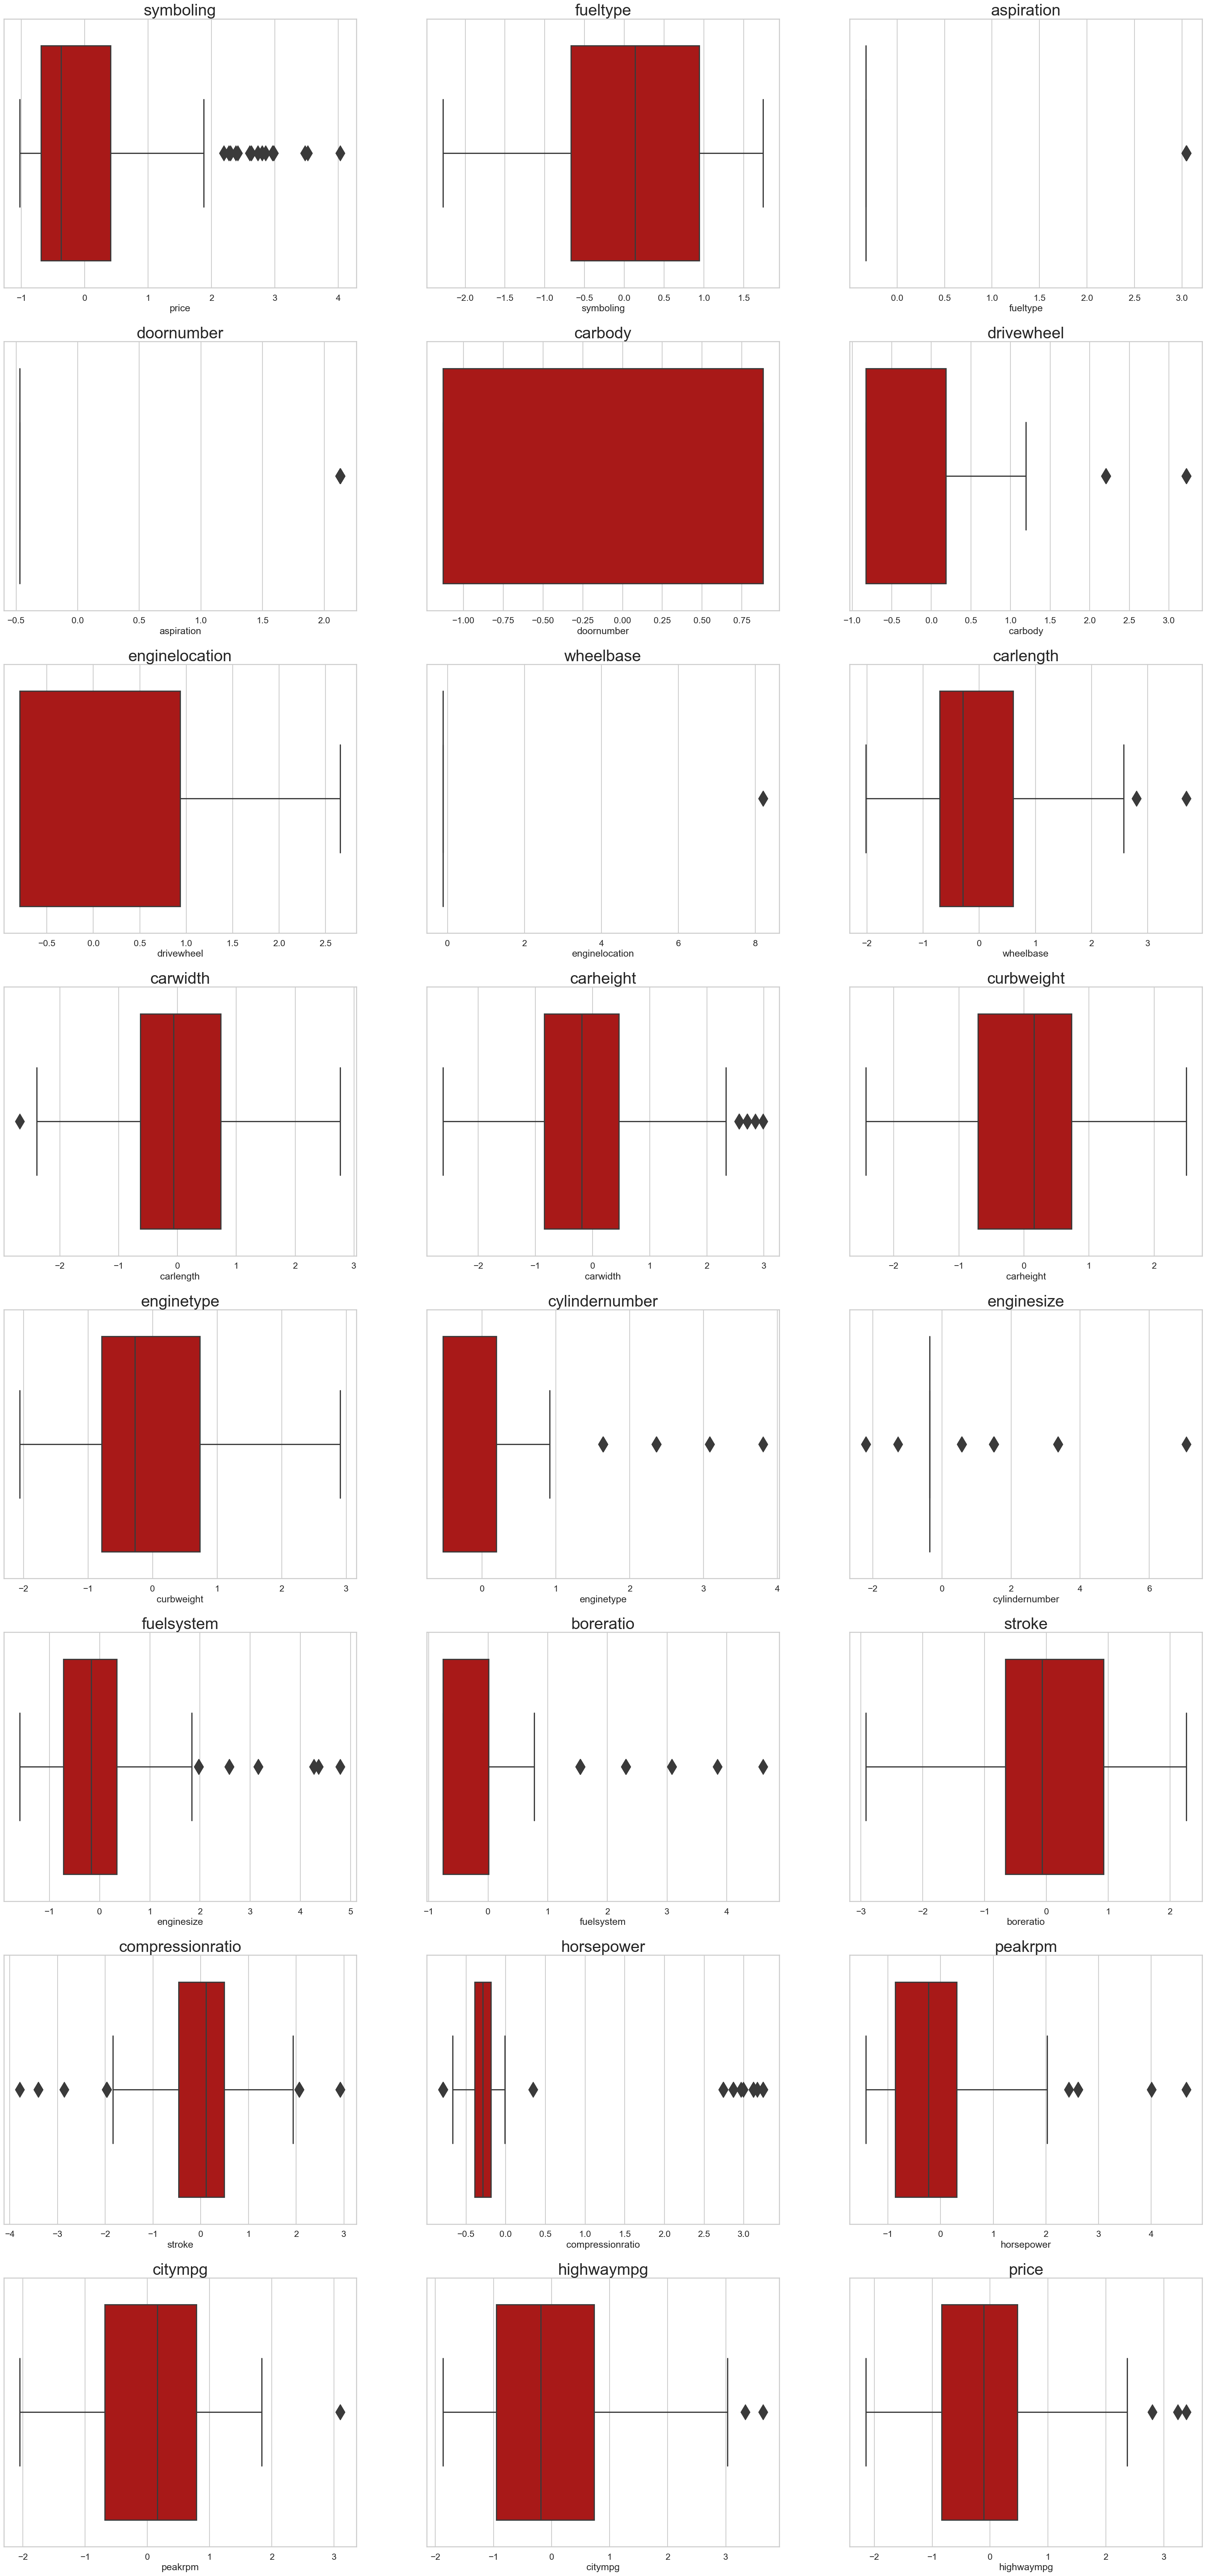

In [12]:
column_names = list(scaled_data.columns)

# checking outliers in boxplot

plt.figure(figsize = (40,280))

sns.set_style('whitegrid')
sns.set_context('talk')

col = column_names

for i in range(len(column_names)):
    plt.subplot(26,3, i+1)
    plt.title(col[i], fontsize = 30)
    sns.boxplot(x = scaled_data.columns[i-1], data = scaled_data, palette = 'gist_heat', orient= 'v', fliersize = 20)

In [13]:
# silhoutte analysis

cluster_range = [2,3,4,5,6,7,8,9]

for i in cluster_range:
    kmeans_new = KMeans(n_clusters = i, max_iter = 200)
    kmeans_new.fit(scaled_data)
    cluster_labels = kmeans_new.labels_
    
    Silhouette_Score = silhouette_score(scaled_data, cluster_labels)
    
    print('Cluster : {}, Silhouette Score : {}'.format(i, Silhouette_Score))

Cluster : 2, Silhouette Score : 0.27401979068661525
Cluster : 3, Silhouette Score : 0.2802224465360733
Cluster : 4, Silhouette Score : 0.25909225867501895
Cluster : 5, Silhouette Score : 0.20321922371744425
Cluster : 6, Silhouette Score : 0.1793460894670963
Cluster : 7, Silhouette Score : 0.258661520047041
Cluster : 8, Silhouette Score : 0.20525487320809563
Cluster : 9, Silhouette Score : 0.22256708541827636


In [14]:
# cluster = 3 because it shows the high score. Therefore n_clusters = 3

kmeans = KMeans(n_clusters = 3, max_iter = 500, random_state = 42)
kmeans.fit(scaled_data)

kmeans.labels_

array([2, 2, 0, 2, 0, 2, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 2, 2,
       2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       2, 2, 0, 0, 0, 0, 1, 2, 1, 2, 2, 1, 2, 2, 2, 0, 1, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0])

In [15]:
new_data['Cluster_id'] = kmeans.labels_
new_data.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Cluster_id
0,3,1,1,2,5,2,1,88.6,168.8,64.1,...,1,3.47,2.68,9.0,111,5000,21,27,13495.0,2
1,3,1,1,2,5,2,1,88.6,168.8,64.1,...,1,3.47,2.68,9.0,111,5000,21,27,16500.0,2
2,1,1,1,2,2,2,1,94.5,171.2,65.5,...,1,2.68,3.47,9.0,154,5000,19,26,16500.0,0
3,2,1,1,4,1,1,1,99.8,176.6,66.2,...,1,3.19,3.40,10.0,102,5500,24,30,13950.0,2
4,2,1,1,4,1,3,1,99.4,176.6,66.4,...,1,3.19,3.40,8.0,115,5500,18,22,17450.0,0


In [16]:
scaled_data['Cluster_id'] = kmeans.labels_
scaled_data.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Cluster_id
0,1.743470,-0.328798,-0.469295,-1.130388,3.217410,0.933994,-0.121867,-1.690772,-0.426521,-0.844782,...,-0.760049,0.519071,-1.839377,-0.288349,0.174483,-0.262960,-0.646553,-0.546059,0.027391,2
1,1.743470,-0.328798,-0.469295,-1.130388,3.217410,0.933994,-0.121867,-1.690772,-0.426521,-0.844782,...,-0.760049,0.519071,-1.839377,-0.288349,0.174483,-0.262960,-0.646553,-0.546059,0.404461,2
2,0.133509,-0.328798,-0.469295,-1.130388,0.182583,0.933994,-0.121867,-0.708596,-0.231513,-0.190566,...,-0.760049,-2.404880,0.685946,-0.288349,1.264536,-0.262960,-0.953012,-0.691627,0.404461,0
3,0.938490,-0.328798,-0.469295,0.884652,-0.829026,-0.790950,-0.121867,0.173698,0.207256,0.136542,...,-0.760049,-0.517266,0.462183,-0.035973,-0.053668,0.787855,-0.186865,-0.109354,0.084485,2
4,0.938490,-0.328798,-0.469295,0.884652,-0.829026,2.658938,-0.121867,0.107110,0.207256,0.230001,...,-0.760049,-0.517266,0.462183,-0.540725,0.275883,0.787855,-1.106241,-1.273900,0.523668,0


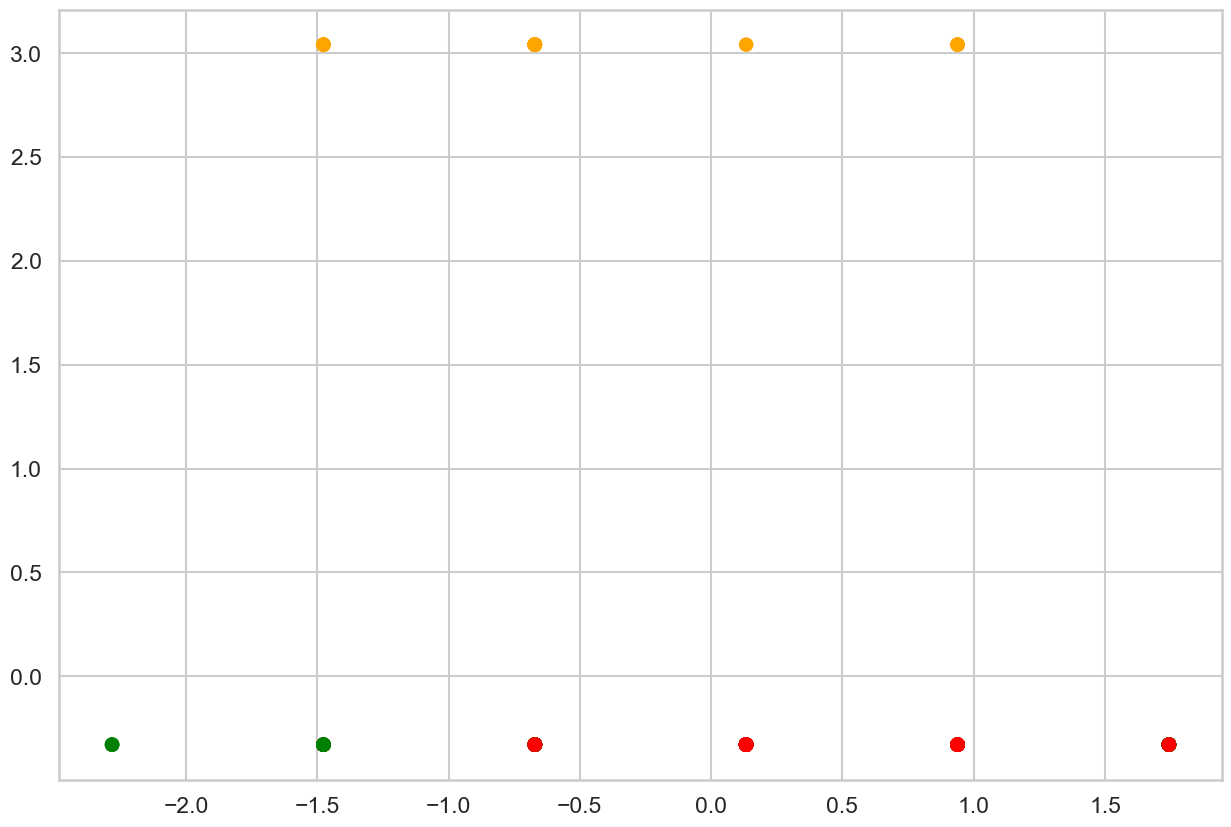

In [17]:
plt.figure(figsize = (15,10))

plt.tight_layout()

plt.scatter(scaled_data.iloc[:,0], scaled_data.iloc[:,1],
           c = scaled_data.Cluster_id.map({ 0 : 'green', 1 : 'orange', 2 : 'red'}))
   
plt.show()

Text(0, 0.5, 'Price')

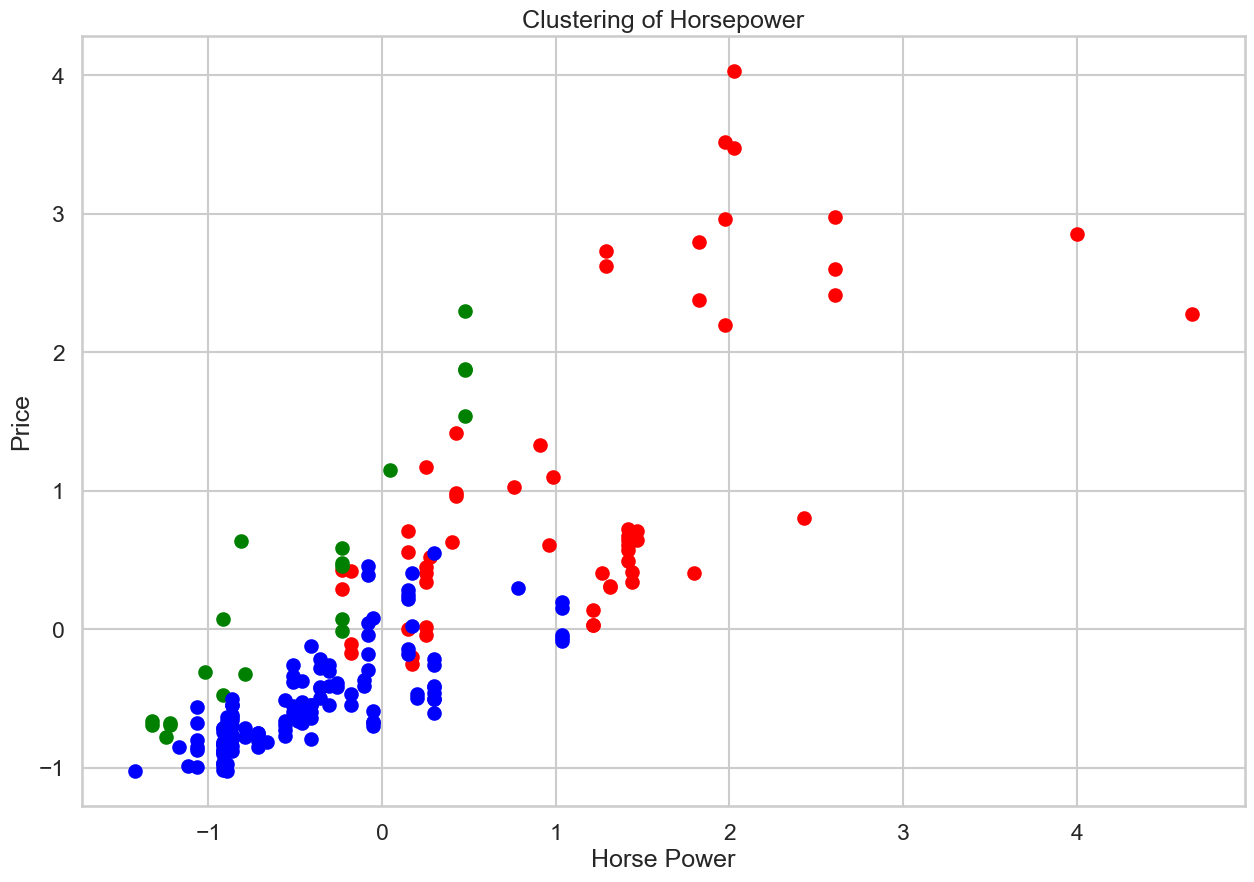

In [18]:
mpg1 = scaled_data[scaled_data['Cluster_id'] == 0]
mpg2 = scaled_data[scaled_data['Cluster_id'] == 1]
mpg3 = scaled_data[scaled_data['Cluster_id'] == 2]

plt.subplots(figsize = ([15,10]))
plt.scatter(mpg1['horsepower'], mpg1['price'],color = 'red')
plt.scatter(mpg2['horsepower'], mpg2['price'],color = 'green')
plt.scatter(mpg3['horsepower'], mpg3['price'],color = 'blue')
plt.title('Clustering of Horsepower')
plt.xlabel('Horse Power')
plt.ylabel('Price')

Text(0, 0.5, 'Price')

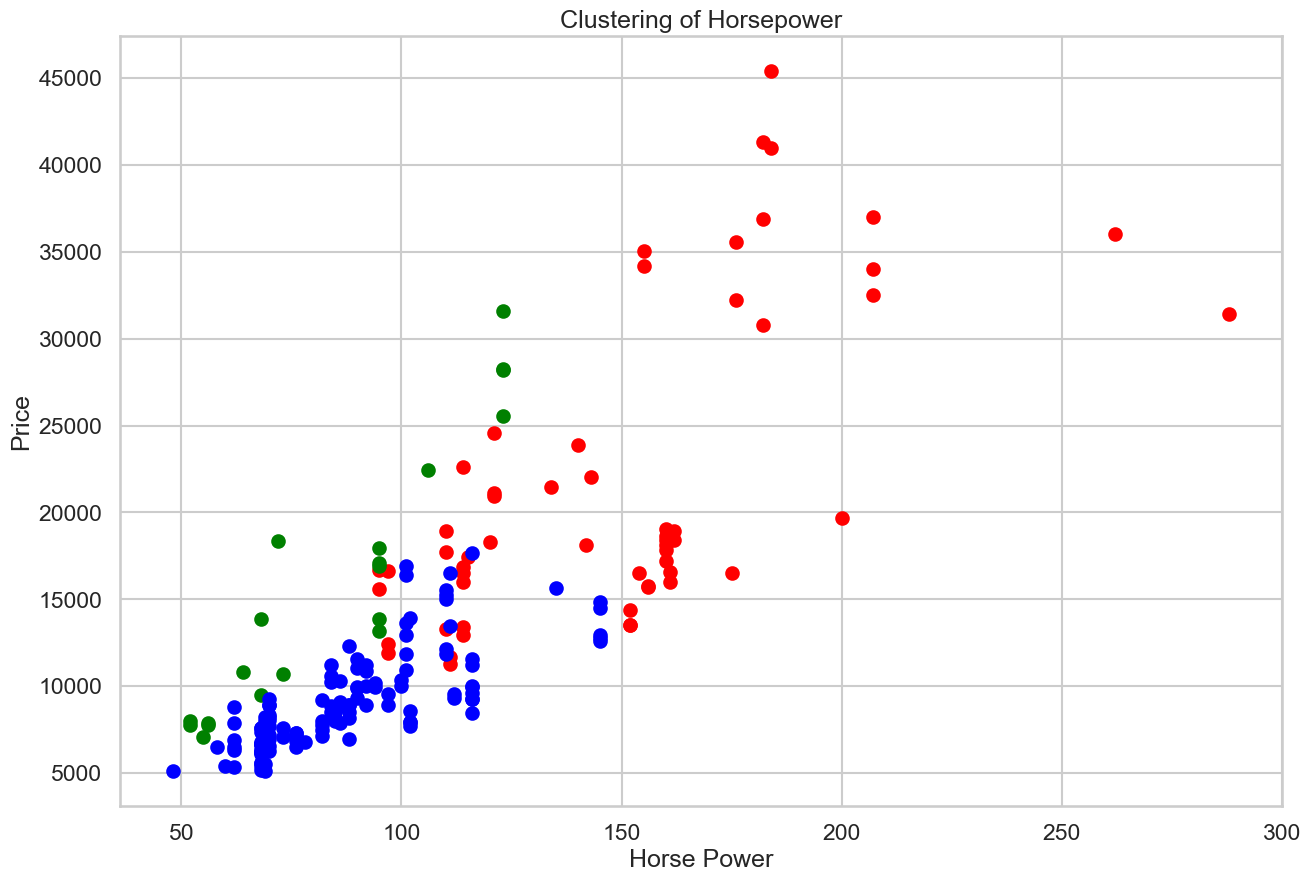

In [19]:
mpg1 = new_data[new_data['Cluster_id'] == 0]
mpg2 = new_data[new_data['Cluster_id'] == 1]
mpg3 = new_data[new_data['Cluster_id'] == 2]

plt.subplots(figsize = ([15,10]))
plt.scatter(mpg1['horsepower'], mpg1['price'],color = 'red')
plt.scatter(mpg2['horsepower'], mpg2['price'],color = 'green')
plt.scatter(mpg3['horsepower'], mpg3['price'],color = 'blue')
plt.title('Clustering of Horsepower')
plt.xlabel('Horse Power')
plt.ylabel('Price')

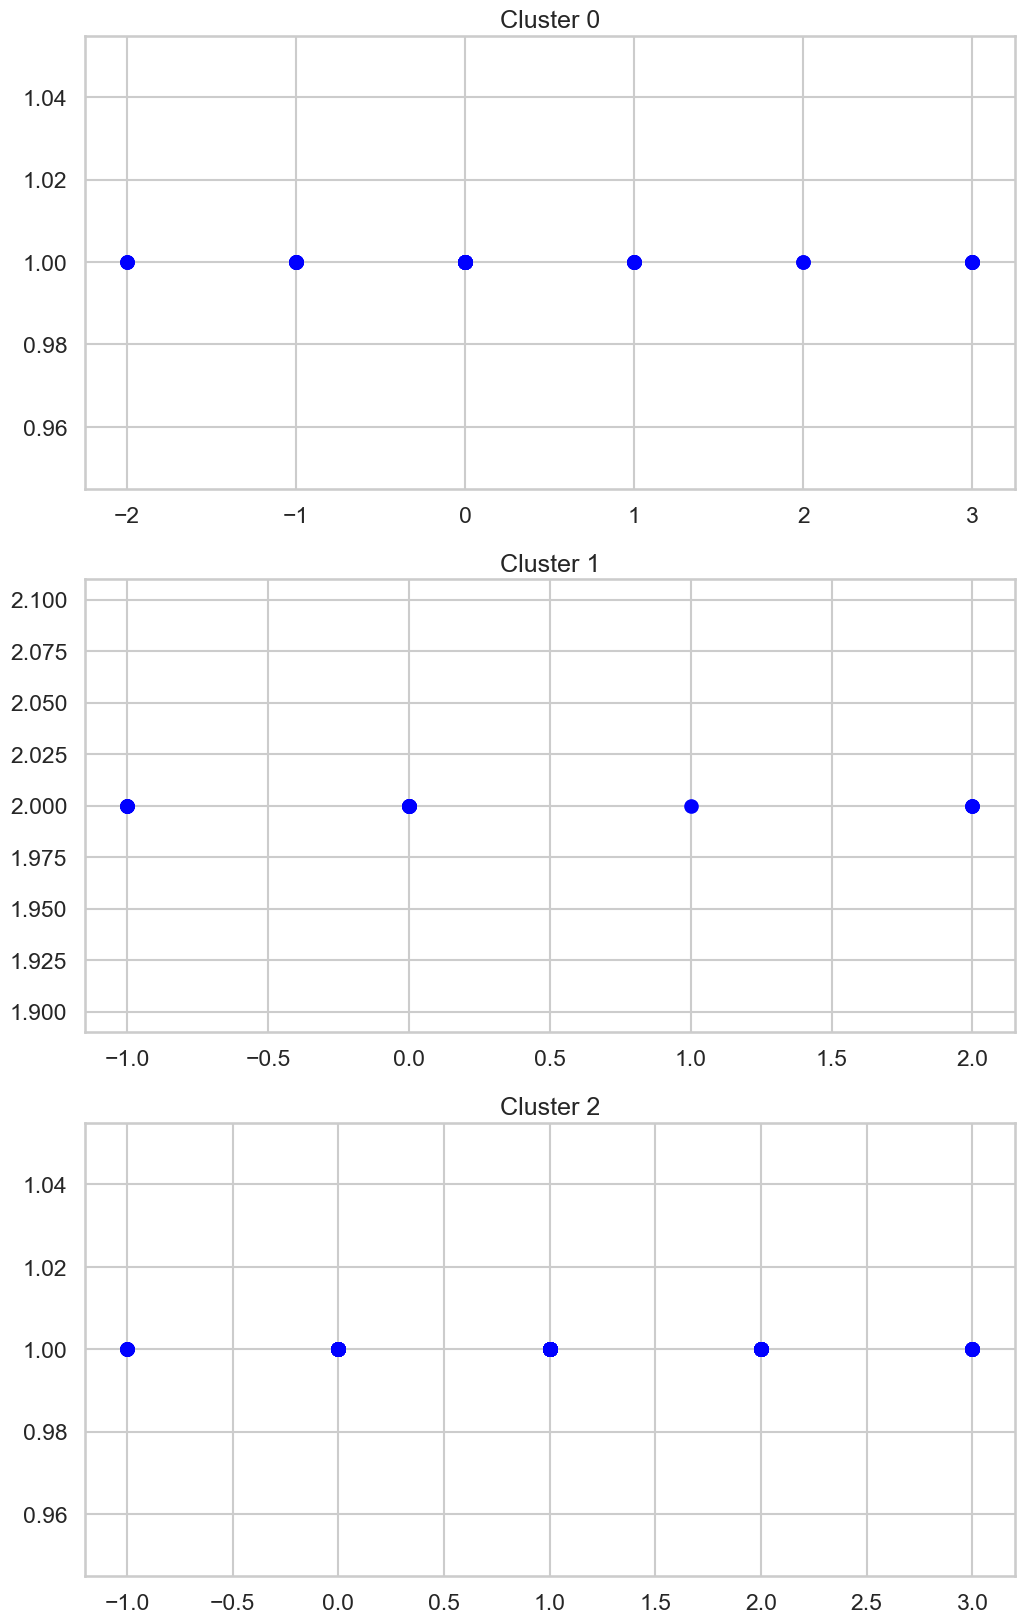

In [20]:
fig, axs = plt.subplots(3, 1, figsize=(12,20))

# Iterate over each cluster and plot the corresponding data points in a separate subplot
for i in range(3):
    # Get the indices of the data points in cluster i
    indices = (kmeans.labels_ == i)
    # Plot the data points in cluster i in a separate subplot
    axs[i].scatter(new_data.iloc[indices, 0], new_data.iloc[indices, 1], color = 'blue')
    axs[i].set_title(f'Cluster {i}')
    
plt.show()

In [21]:
new_data.head().T

,0,1,2,3,4
symboling,3.00,3.00,1.00,2.00,2.00
fueltype,1.00,1.00,1.00,1.00,1.00
aspiration,1.00,1.00,1.00,1.00,1.00
doornumber,2.00,2.00,2.00,4.00,4.00
carbody,5.00,5.00,2.00,1.00,1.00
drivewheel,2.00,2.00,2.00,1.00,3.00
enginelocation,1.00,1.00,1.00,1.00,1.00
wheelbase,88.60,88.60,94.50,99.80,99.40
carlength,168.80,168.80,171.20,176.60,176.60
carwidth,64.10,64.10,65.50,66.20,66.40


In [22]:
new_car = {
    'symboling': 2,
    'fueltype': 1,
    'aspiration': 1,
    'doornumber': 2,
    'carbody': 2,
    'drivewheel': 2,
    'enginelocation': 1,
    'wheelbase': 94.50,
    'carlength': 171.20,
    'carwidth': 65.50,
    'carheight': 52.40,
    'curbweight': 2823.00,
    'enginetype': 3.00,
    'cylindernumber': 6.00,
    'enginesize': 152.00,
    'fuelsystem': 1.00,
    'boreratio': 2.68,
    'stroke': 3.47,
    'compressionratio': 9.00,
    'horsepower': 154.00,
    'peakrpm': 5000.00,
    'citympg': 19.00,
    'highwaympg': 26.00,
    'price':16500.00
}

scaled_new_car = sc.transform([list(new_car.values())])

# Predict the class of the new car
predicted_cluster = kmeans.predict(scaled_new_car)[0]

# Print the predicted class of the new car
print('The predicted class of the new car is:', predicted_cluster)

The predicted class of the new car is: 0


# Using clustering, the class of car is predicted